In [12]:
#QUESTION 7
#ARE THERE ANY OUTLIERS IN THE 'ATTENDING STATUS' & 'QUANTITY' ATTRIBUTE?

Yes, Outliners exits in the attendee status and quanity.
The Number of Outliners: 12


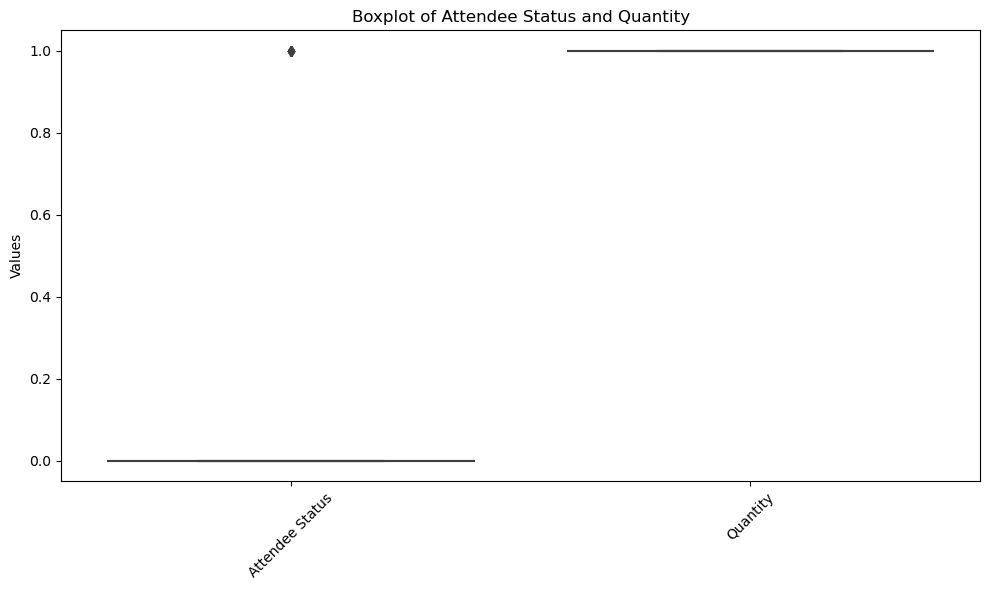

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

#Extract data from Excel file
df = pd.read_excel(r"C:\Users\TUF\Downloads\Data analyst Data.xlsx")

#Assuming 'Attendee Status' and 'Quantity' are the columns of interest
columns_of_interest = ['Attendee Status', 'Quantity']

#Convert categorical 'Attendee Status' to numeric for outlier detection
df['Attendee Status'] = pd.factorize(df['Attendee Status'])[0]

#Outliers detection using IQR
Q1 = df[columns_of_interest].quantile(0.25)
Q3 = df[columns_of_interest].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((df[columns_of_interest] < (Q1 - 1.5 * IQR)) | (df[columns_of_interest] > (Q3 + 1.5 * IQR))).any(axis=1)

if (len(df[outliers_iqr])>0):
    print("Yes, Outliners exits in the attendee status and quanity.")
    print("The Number of Outliners:",len(df[outliers_iqr]))

#Visual inspection using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[columns_of_interest])
plt.title('Boxplot of Attendee Status and Quantity')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
